In [764]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [765]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read the dataset

In [766]:
data = pd.read_csv('/Users/vernica.ahuja/Downloads/Telecome Churn Case study/telecom-churn-case-study-hackathon-c45/train.csv')

In [767]:
## RUN ON TEST DATASET
test_set = pd.read_csv('/Users/vernica.ahuja/Downloads/Telecome Churn Case study/telecom-churn-case-study-hackathon-c45/test.csv')

In [768]:
pd.set_option('display.max_columns', 300)

In [769]:
data.shape

(69999, 172)

In [770]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [771]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [772]:
# Deleting duplicate rows
data.drop_duplicates(inplace=True)

In [773]:
data.shape

(69999, 172)

### Finding missing values

In [774]:
null_vals = round((data.isnull().sum()/len(data))*100,4).to_frame()

In [775]:
pd.set_option('display.max_rows', 300)

In [776]:
null_vals.sort_values(0,ascending=False)

,0
arpu_3g_6,74.9025
count_rech_2g_6,74.9025
night_pck_user_6,74.9025
arpu_2g_6,74.9025
date_of_last_rech_data_6,74.9025
total_rech_data_6,74.9025
av_rech_amt_data_6,74.9025
max_rech_data_6,74.9025
count_rech_3g_6,74.9025
fb_user_6,74.9025


In [777]:
null_vals.columns = ['Null_per']

In [778]:
null_vals.head()

,Null_per
id,0.0000
circle_id,0.0000
loc_og_t2o_mou,1.0029
std_og_t2o_mou,1.0029
loc_ic_t2o_mou,1.0029


In [779]:
null_cols = list(null_vals.index[null_vals['Null_per'] > 30])

In [780]:
null_cols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [781]:
# Delete columns with more then 70% values missing
data.drop(null_cols,axis=1,inplace=True)
test_set.drop(null_cols,axis=1,inplace=True)

In [782]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014

In [783]:
# Drop the date columns
date_cols = [k for k in data.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [784]:
data = data.drop(date_cols, axis=1)
test_set = test_set.drop(date_cols, axis=1)

In [785]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.

In [786]:
data.shape

(69999, 136)

In [788]:
test_set.shape

(30000, 135)

In [789]:
# check columns unique values and drop such columns with its value as 1

In [790]:
unique_col_1=[]
for i in data.columns:
    if data[i].nunique() == 1:
        unique_col_1.append(i)
    else:
        pass

data.drop(unique_col_1, axis=1, inplace = True)
test_set.drop(unique_col_1, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
        unique_col_1)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [791]:
data.shape

(69999, 126)

In [792]:
test_set.shape

(30000, 125)

In [793]:
# Handling missing values

In [794]:
data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,5

In [795]:
null_vals = round((data.isnull().sum()/len(data))*100,4).to_frame()

In [796]:
null_vals

,0
id,0.0000
arpu_6,0.0000
arpu_7,0.0000
arpu_8,0.0000
onnet_mou_6,3.9543
onnet_mou_7,3.8386
onnet_mou_8,5.2901
offnet_mou_6,3.9543
offnet_mou_7,3.8386
offnet_mou_8,5.2901


In [797]:
null_vals.columns = ['Null_per']

In [798]:
# missing values for MOU of all type of calls for June month is same

In [799]:
# Listing the columns of MOU June
print(((null_vals[null_vals['Null_per'] ==3.9543]).index).to_list())

['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']


In [800]:
# Creating a dataframe with the condition, in which MOU for JUNE are null
data_null_mou_6 = data[(data['onnet_mou_6'].isnull()) & (data['offnet_mou_6'].isnull()) & (data['roam_ic_mou_6'].isnull()) & (data['roam_og_mou_6'].isnull()) &
  (data['loc_og_t2t_mou_6'].isnull()) & (data['loc_og_t2m_mou_6'].isnull()) & (data['loc_og_t2f_mou_6'].isnull()) & (data['loc_og_t2c_mou_6'].isnull()) &
  (data['loc_og_mou_6'].isnull()) & (data['std_og_t2t_mou_6'].isnull()) & (data['std_og_t2m_mou_6'].isnull()) & (data['std_og_t2f_mou_6'].isnull()) &
  (data['std_og_mou_6'].isnull()) & (data['isd_og_mou_6'].isnull()) & (data['spl_og_mou_6'].isnull()) & (data['og_others_6'].isnull()) & 
  (data['loc_ic_t2t_mou_6'].isnull()) & (data['loc_ic_t2m_mou_6'].isnull()) & (data['loc_ic_t2f_mou_6'].isnull()) & (data['loc_ic_mou_6'].isnull()) & 
  (data['std_ic_t2t_mou_6'].isnull()) & (data['std_ic_t2m_mou_6'].isnull()) & (data['std_ic_t2f_mou_6'].isnull()) & (data['std_ic_mou_6'].isnull()) & 
  (data['spl_ic_mou_6'].isnull()) & (data['spl_ic_mou_6'].isnull()) & (data['isd_ic_mou_6'].isnull()) & (data['ic_others_6'].isnull())]

data_null_mou_6.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
26,26,0.000,36.344,104.570,NaN,2.86,1.75,NaN,28.66,86.83,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.83,0.00,NaN,0.00,5.76,NaN,0.00,0.50,NaN,0.0,0.00,NaN,0.83,6.26,NaN,2.03,1.75,NaN,28.66,80.56,NaN,0.0,0.00,NaN,30.69,82.31,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.0,0.0,31.53,88.58,NaN,0.00,0.00,NaN,2.91,6.94,NaN,0.00,1.64,NaN,2.91,8.59,NaN,0.00,0.0,NaN,0.15,2.30,NaN,0.0,0.00,NaN,0.15,2.30,0.0,3.06,10.89,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.0,1,3,11,0,50,110,0,20,30,0,20,20,0.0,0.00,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1276,0.0,0.0,0.0,0
33,33,438.077,0.000,213.781,NaN,NaN,0.00,NaN,NaN,2.68,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,2.68,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,2.68,NaN,NaN,0.0,0.0,0.00,2.68,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.0,0.00,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,1,3,2,505,0,252,505,0,252,505,0,252,0.0,0.00,0.0,756.47,0.00,74.29,0,0,0,0,0,0,1,0,1,0,0,0,457,0.0,0.0,0.0,1
95,95,0.000,46.770,187.134,NaN,3.36,18.26,NaN,21.03,186.86,NaN,0.0,0.0,NaN,0.0,0.0,NaN,3.36,18.26,NaN,18.96,151.41,NaN,2.06,35.44,NaN,0.0,0.00,NaN,24.39,205.13,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,1.85,0.00,NaN,0.0,0.0,0.0,26.24,205.13,NaN,0.00,22.96,NaN,100.31,260.69,NaN,0.00,8.61,NaN,100.31,292.28,NaN,0.00,0.0,NaN,0.00,1.25,NaN,0.0,4.56,NaN,0.00,5.81,0.0,100.31,298.09,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.0,0,1,2,0,0,250,0,0,250,0,0,0,0.0,0.00,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,3234,0.0,0.0,0.0,0
101,101,0.000,261.500,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,5,0,308,0,0,154,0,0,154,0,0.0,21.22,0.0,0.00,3.14,0.00,0,2,0,0,0,0,0,0,0,0,0,0,200,0.0,0.0,0.0,0
135,135,0.000,482.035,718.352,NaN,4.04,3.01,NaN,581.86,758.89,NaN,0.0,0.0,NaN,0.0,0.0,NaN,4.04,3.01,NaN,581.86,743.03,NaN,0.00,4.09,NaN

In [801]:
data_null_mou_6.shape

(2768, 126)

In [802]:
# test_null_mou_6 = test_set[(test_set['onnet_mou_6'].isnull()) & (test_set['offnet_mou_6'].isnull()) & (test_set['roam_ic_mou_6'].isnull()) & (test_set['roam_og_mou_6'].isnull()) &
#   (test_set['loc_og_t2t_mou_6'].isnull()) & (test_set['loc_og_t2m_mou_6'].isnull()) & (test_set['loc_og_t2f_mou_6'].isnull()) & (test_set['loc_og_t2c_mou_6'].isnull()) &
#   (test_set['loc_og_mou_6'].isnull()) & (test_set['std_og_t2t_mou_6'].isnull()) & (test_set['std_og_t2m_mou_6'].isnull()) & (test_set['std_og_t2f_mou_6'].isnull()) &
#   (test_set['std_og_mou_6'].isnull()) & (test_set['isd_og_mou_6'].isnull()) & (test_set['spl_og_mou_6'].isnull()) & (test_set['og_others_6'].isnull()) & 
#   (test_set['loc_ic_t2t_mou_6'].isnull()) & (test_set['loc_ic_t2m_mou_6'].isnull()) & (test_set['loc_ic_t2f_mou_6'].isnull()) & (test_set['loc_ic_mou_6'].isnull()) & 
#   (test_set['std_ic_t2t_mou_6'].isnull()) & (test_set['std_ic_t2m_mou_6'].isnull()) & (test_set['std_ic_t2f_mou_6'].isnull()) & (test_set['std_ic_mou_6'].isnull()) & 
#   (test_set['spl_ic_mou_6'].isnull()) & (test_set['spl_ic_mou_6'].isnull()) & (test_set['isd_ic_mou_6'].isnull()) & (test_set['ic_others_6'].isnull())]

# test_null_mou_6.head()

In [803]:
data = data.drop(data_null_mou_6.index)

In [804]:
data.shape

(67231, 126)

In [805]:
# Again check for missing values

null_vals = round((data.isnull().sum()/len(data))*100,4).to_frame()
null_vals.columns = ['Null_per']

In [806]:
null_vals

,Null_per
id,0.0000
arpu_6,0.0000
arpu_7,0.0000
arpu_8,0.0000
onnet_mou_6,0.0000
onnet_mou_7,2.1419
onnet_mou_8,4.1796
offnet_mou_6,0.0000
offnet_mou_7,2.1419
offnet_mou_8,4.1796


In [807]:
# Similarly for July & Aug

# Listing the columns of MOU July
print(((null_vals[null_vals['Null_per'] ==2.1419]).index).to_list())

['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']


In [808]:
# Creating a dataframe with the condition, in which MOU for JUNE are null
data_null_mou_7 = data[(data['onnet_mou_7'].isnull()) & (data['offnet_mou_7'].isnull()) & (data['roam_ic_mou_7'].isnull()) & (data['roam_og_mou_7'].isnull()) &
  (data['loc_og_t2t_mou_7'].isnull()) & (data['loc_og_t2m_mou_7'].isnull()) & (data['loc_og_t2f_mou_7'].isnull()) & (data['loc_og_t2c_mou_7'].isnull()) &
  (data['loc_og_mou_7'].isnull()) & (data['std_og_t2t_mou_7'].isnull()) & (data['std_og_t2m_mou_7'].isnull()) & (data['std_og_t2f_mou_7'].isnull()) &
  (data['std_og_mou_7'].isnull()) & (data['isd_og_mou_7'].isnull()) & (data['spl_og_mou_7'].isnull()) & (data['og_others_7'].isnull()) & 
  (data['loc_ic_t2t_mou_7'].isnull()) & (data['loc_ic_t2m_mou_7'].isnull()) & (data['loc_ic_t2f_mou_7'].isnull()) & (data['loc_ic_mou_7'].isnull()) & 
  (data['std_ic_t2t_mou_7'].isnull()) & (data['std_ic_t2m_mou_7'].isnull()) & (data['std_ic_t2f_mou_7'].isnull()) & (data['std_ic_mou_7'].isnull()) & 
  (data['spl_ic_mou_7'].isnull()) & (data['spl_ic_mou_7'].isnull()) & (data['isd_ic_mou_7'].isnull()) & (data['ic_others_7'].isnull())]

data_null_mou_7.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
37,37,383.327,-5.000,0.000,54.41,NaN,NaN,780.21,NaN,NaN,2.86,NaN,NaN,15.74,NaN,NaN,5.39,NaN,NaN,23.43,NaN,NaN,0.0,NaN,NaN,1.26,NaN,NaN,28.83,NaN,NaN,46.91,NaN,NaN,727.44,NaN,NaN,0.0,NaN,NaN,774.36,NaN,NaN,0.0,NaN,NaN,19.43,NaN,NaN,0.58,NaN,NaN,823.21,0.0,0.00,19.24,NaN,NaN,17.93,NaN,NaN,0.00,NaN,NaN,37.18,NaN,NaN,21.79,NaN,NaN,13.21,NaN,NaN,0.0,NaN,NaN,35.01,NaN,NaN,72.19,0.0,0.00,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,6,2,1,366,0,0,110,0,0,0,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,482,0.00,0.00,0.00,0
54,54,161.149,30.278,8.713,0.80,NaN,0.00,0.00,NaN,0.55,0.00,NaN,0.0,0.00,NaN,0.0,0.80,NaN,0.00,0.00,NaN,0.55,0.0,NaN,0.0,0.00,NaN,0.00,0.80,NaN,0.55,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.0,4.63,NaN,0.00,1.43,NaN,0.0,6.86,0.0,0.55,0.78,NaN,0.00,3.14,NaN,0.45,0.46,NaN,0.0,4.39,NaN,0.45,0.00,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.0,4.39,0.0,0.45,0.0,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.0,16,3,3,181,34,10,25,17,10,17,0,10,19.05,0.74,0.0,1209.28,115.81,0.0,0,0,0,10,2,0,0,0,0,0,0,0,730,0.00,68.80,167.17,0
59,59,0.000,213.793,0.000,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.48,NaN,NaN,0.48,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.48,0.0,0.00,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,3,4,2,0,252,0,0,252,0,0,0,0,0.00,663.95,0.0,0.00,1057.73,0.0,0,0,0,0,0,0,0,1,0,0,0,0,224,11.04,1067.99,0.00,1
118,118,219.956,0.000,305.372,217.59,NaN,313.98,1.96,NaN,3.78,0.55,NaN,0.0,10.33,NaN,0.0,0.94,NaN,1.03,1.96,NaN,0.00,0.0,NaN,0.0,0.00,NaN,0.16,2.91,NaN,1.03,206.31,NaN,312.94,0.00,NaN,0.0,0.0,NaN,0.0,206.31,NaN,312.94,0.0,NaN,0.0,0.00,NaN,7.16,0.00,NaN,0.0,209.23,0.0,321.14,5.28,NaN,9.41,5.03,NaN,0.84,0.00,NaN,0.0,10.31,NaN,10.26,0.00,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.0,10.31,0.0,10.53,0.0,NaN,0.26,0.0,NaN,0.0,0.0,NaN,0.0,10,5,11,242,0,336,41,0,36,0,0,30,5.68,0.00,0.0,224.47,0.00,0.0,0,0,0,0,0,0,0,0,0,2,0,0,1036,0.00,0.00,0.00,0
145,145,284.634,68.710,1.000,119.79,NaN,NaN,117.44,NaN,NaN,3.78,NaN,NaN,32.23,NaN,NaN,2.66,NaN,

In [809]:
data_null_mou_7.shape

(1440, 126)

In [810]:
data = data.drop(data_null_mou_7.index)

In [811]:
data.shape

(65791, 126)

In [812]:
# again check for missing values
null_vals = round((data.isnull().sum()/len(data))*100,4).to_frame()
null_vals.columns = ['Null_per']

In [813]:
null_vals

,Null_per
id,0.0000
arpu_6,0.0000
arpu_7,0.0000
arpu_8,0.0000
onnet_mou_6,0.0000
onnet_mou_7,0.0000
onnet_mou_8,2.9624
offnet_mou_6,0.0000
offnet_mou_7,0.0000
offnet_mou_8,2.9624


In [814]:
# Similarly for Aug

# Listing the columns of MOU Aug
print(((null_vals[null_vals['Null_per'] ==2.9624]).index).to_list())

['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']


In [815]:
# Creating a dataframe with the condition, in which MOU for JUNE are null
data_null_mou_8 = data[(data['onnet_mou_8'].isnull()) & (data['offnet_mou_8'].isnull()) & (data['roam_ic_mou_8'].isnull()) & (data['roam_og_mou_8'].isnull()) &
  (data['loc_og_t2t_mou_8'].isnull()) & (data['loc_og_t2m_mou_8'].isnull()) & (data['loc_og_t2f_mou_8'].isnull()) & (data['loc_og_t2c_mou_8'].isnull()) &
  (data['loc_og_mou_8'].isnull()) & (data['std_og_t2t_mou_8'].isnull()) & (data['std_og_t2m_mou_8'].isnull()) & (data['std_og_t2f_mou_8'].isnull()) &
  (data['std_og_mou_8'].isnull()) & (data['isd_og_mou_8'].isnull()) & (data['spl_og_mou_8'].isnull()) & (data['og_others_8'].isnull()) & 
  (data['loc_ic_t2t_mou_8'].isnull()) & (data['loc_ic_t2m_mou_8'].isnull()) & (data['loc_ic_t2f_mou_8'].isnull()) & (data['loc_ic_mou_8'].isnull()) & 
  (data['std_ic_t2t_mou_8'].isnull()) & (data['std_ic_t2m_mou_8'].isnull()) & (data['std_ic_t2f_mou_8'].isnull()) & (data['std_ic_mou_8'].isnull()) & 
  (data['spl_ic_mou_8'].isnull()) & (data['spl_ic_mou_8'].isnull()) & (data['isd_ic_mou_8'].isnull()) & (data['ic_others_8'].isnull())]

data_null_mou_8.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
31,31,894.407,126.500,255.7,412.71,89.09,NaN,837.88,108.01,NaN,0.00,0.00,NaN,0.00,0.00,NaN,102.08,11.16,NaN,304.18,59.36,NaN,3.28,4.33,NaN,0.00,0.90,NaN,409.54,74.86,NaN,310.63,77.93,NaN,530.41,43.41,NaN,0.0,0.0,NaN,841.04,121.34,NaN,0.0,0.0,NaN,0.00,0.90,NaN,0.00,0.0,NaN,1250.59,197.11,0.0,3.08,0.30,NaN,18.09,0.61,NaN,1.64,0.0,NaN,22.83,0.91,NaN,14.33,0.08,NaN,6.06,0.00,NaN,0.00,0.0,NaN,20.39,0.08,NaN,43.43,0.99,0.0,0.19,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,1,0,0,104,0,0,104,0,0,104,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,303,0.0,0.0,0.0,1
41,41,53.997,131.395,0.0,37.75,166.74,NaN,1.50,78.26,NaN,0.00,0.00,NaN,0.00,1.15,NaN,0.00,0.01,NaN,0.00,6.06,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,6.08,NaN,37.75,166.73,NaN,1.50,65.11,NaN,0.0,0.0,NaN,39.25,231.84,NaN,0.0,0.0,NaN,0.00,5.93,NaN,0.00,0.0,NaN,39.25,243.86,0.0,0.00,5.31,NaN,0.00,6.08,NaN,0.00,0.0,NaN,0.00,11.39,NaN,0.00,2.29,NaN,5.30,13.38,NaN,0.00,0.0,NaN,5.30,15.68,NaN,5.30,27.08,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,2,10,3,66,140,0,36,30,0,36,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,194,0.0,0.0,0.0,1
76,76,621.879,3.000,0.0,889.63,0.00,NaN,335.58,2.44,NaN,0.00,0.00,NaN,0.00,0.00,NaN,15.81,0.00,NaN,27.73,0.00,NaN,0.00,0.00,NaN,2.58,2.44,NaN,43.54,0.00,NaN,873.81,0.00,NaN,301.19,0.00,NaN,0.0,0.0,NaN,1175.01,0.00,NaN,0.0,0.0,NaN,12.11,7.41,NaN,5.86,0.0,NaN,1236.54,7.41,0.0,33.49,11.54,NaN,49.38,15.41,NaN,0.00,0.0,NaN,82.88,26.96,NaN,23.23,23.44,NaN,7.81,38.81,NaN,0.00,0.0,NaN,31.04,62.26,NaN,113.93,89.23,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,12,0,2,715,0,0,110,0,0,110,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,487,0.0,0.0,0.0,1
77,77,242.224,3.736,0.0,507.94,0.41,NaN,15.19,0.00,NaN,1.84,0.03,NaN,38.24,0.41,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,474.44,0.00,NaN,10.45,0.00,NaN,0.0,0.0,NaN,484.89,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.0,NaN,484.89,0.00,0.0,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.00,0.00,NaN,0.00,0.00,NaN,11.49,0.00,NaN,0.00,0.0,NaN,11.49,0.00,NaN,11.49,0.00,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,7,5,1,230,50,0,90,50,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,293,0.0,0.0,0.0,0
177,177,596.301,146.073,0.0,55.1

In [816]:
data_null_mou_8.shape

(1949, 126)

In [817]:
data = data.drop(data_null_mou_8.index)

In [818]:
data.shape

(63842, 126)

In [819]:
# again check for missing values
null_vals = round((data.isnull().sum()/len(data))*100,4).to_frame()
null_vals.columns = ['Null_per']

In [820]:
null_vals

,Null_per
id,0.0
arpu_6,0.0
arpu_7,0.0
arpu_8,0.0
onnet_mou_6,0.0
onnet_mou_7,0.0
onnet_mou_8,0.0
offnet_mou_6,0.0
offnet_mou_7,0.0
offnet_mou_8,0.0


In [821]:
data.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.00000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000
mean,35007.995270,290.717910,291.918351,292.314734,132.461647,136.413560,132.63037,198.832511,201.492158,196.500873,9.621639,7.046054,7.021533,13.912921,9.833203,9.716878,47.916809,47.956030,46.775476,94.908462,93.952513,93.094732,3.828190,3.904767,3.730028,1.128410,1.359867,1.395431,146.660885,145.820827,143.607604,79.056977,84.515121,82.050914,86.538170,92.543546,88.579490,1.144254,1.115437,1.071439,166.742117,178.176808,171.704436,0.776828,0.786096,0.805922,3.924543,5.021196,5.006439,0.446983,0.024810,0.031459,318.558673,329.836445,321.162571,48.

In [822]:
data.dtypes.astype(str), 

(id                      int64
 arpu_6                float64
 arpu_7                float64
 arpu_8                float64
 onnet_mou_6           float64
 onnet_mou_7           float64
 onnet_mou_8           float64
 offnet_mou_6          float64
 offnet_mou_7          float64
 offnet_mou_8          float64
 roam_ic_mou_6         float64
 roam_ic_mou_7         float64
 roam_ic_mou_8         float64
 roam_og_mou_6         float64
 roam_og_mou_7         float64
 roam_og_mou_8         float64
 loc_og_t2t_mou_6      float64
 loc_og_t2t_mou_7      float64
 loc_og_t2t_mou_8      float64
 loc_og_t2m_mou_6      float64
 loc_og_t2m_mou_7      float64
 loc_og_t2m_mou_8      float64
 loc_og_t2f_mou_6      float64
 loc_og_t2f_mou_7      float64
 loc_og_t2f_mou_8      float64
 loc_og_t2c_mou_6      float64
 loc_og_t2c_mou_7      float64
 loc_og_t2c_mou_8      float64
 loc_og_mou_6          float64
 loc_og_mou_7          float64
 loc_og_mou_8          float64
 std_og_t2t_mou_6      float64
 std_og_

In [823]:
# Filtering High valued customer 

In [824]:
# creating a new column by taking avg of total_rech_amt_6 & total_rech_amt_7 
data['avg_rech_amt_6_7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [825]:
# find 70th percentile of avg_rech_amt_6_7
X = data['avg_rech_amt_6_7'].quantile(0.7)
X

383.0

In [826]:
data = data[data['avg_rech_amt_6_7'] >= X]
data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.36,252.48,257.74,129.73,0.00,0.00,0.00,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,52.49,37.84,19.

In [827]:
data.shape

(19180, 127)

In [828]:
data.drop(['total_rech_amt_6','total_rech_amt_7'],axis=1,inplace=True)

In [829]:
# Adding this column and dropping variables from test data
test_set['avg_rech_amt_6_7'] = (test_set['total_rech_amt_6'] + test_set['total_rech_amt_7'])/2

In [830]:
test_set.drop(['total_rech_amt_6','total_rech_amt_7'],axis=1,inplace=True)

In [832]:
data.shape

(19180, 125)

In [831]:
test_set.shape

(30000, 124)

## Defining Churn Variable

In [754]:
# deriving churn variable using total_ic_mou_8,total_og_mou_8,vol_2g_mb_8 and vol_3g_mb_8 features

In [833]:
data['churn'] = np.where((data['total_ic_mou_8']==0) & (data['total_og_mou_8']==0) & (data['vol_2g_mb_8']==0) & (data['vol_3g_mb_8']==0), 1, 0)


In [834]:
data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.36,252.48,257.74,129.73,0.00,0.00,0.00,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,52.49,37.84,19.14,170.61,106.71,150.73,0.00,1.53,1.13,223.11,1

0    96.913452
1     3.086548
Name: churn, dtype: float64


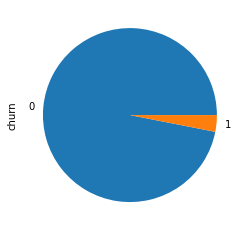

In [835]:
# lets find out churn/non churn percentage
print((data['churn'].value_counts()/len(data))*100)
((data['churn'].value_counts()/len(data))*100).plot(kind="pie")
plt.show()

#### 
As we can see ~97% of do not churn, there is a possibility of class imbalance

In [836]:
# Drop variables used to create the churn variable
col_8 = [col for col in data.columns.to_list() if '_8' in col]
print(col_8)

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8']


In [837]:
data.drop(col_8, axis=1, inplace=True)

In [838]:
test_set.drop(col_8, axis=1, inplace=True)

In [839]:
data.shape

(19180, 86)

In [840]:
test_set.shape

(30000, 84)

In [841]:
data.columns

Index(['id', 'arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
       'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',


In [842]:
data = data.drop('aug_vbc_3g', axis=1)

In [843]:
test_set = test_set.drop('aug_vbc_3g', axis=1)

In [844]:
data.shape

(19180, 85)

In [845]:
test_set.shape

(30000, 83)

In [846]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
data_corr = data.corr()

In [847]:
data_corr

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn
id,1.000000,0.001307,0.001841,0.003137,0.007022,-0.016246,-0.013139,0.006546,-0.007824,-0.005003,-0.014020,-0.004002,0.002730,0.006049,0.009110,0.005311,0.002560,0.004783,-0.000436,0.001733,0.007680,0.005632,0.006917,-0.020488,-0.017306,0.008842,0.015611,-0.009888,-0.006834,-0.002451,-0.002290,-0.001471,0.005369,0.010906,0.006817,-0.008297,-0.002128,0.006255,0.006139,0.008485,0.011040,0.003367,0.006255,0.009656,0.011903,-0.001133,0.002591,-0.001774,0.000686,0.007492,0.013570,-0.000708,0.003727,0.009001,0.013150,0.009179,0.004535,0.004441,0.007423,0.001546,0.001713,0.002593,-0.000463,0.006766,0.003816,0.002126,0.006036,0.008737,-0.006252,0.004644,0.004965,-0.005786,0.002325,0.007194,0.000294,0.011145,0.005268,-0.001502,-0.000590,-0.004398,0.004717,0.001002,-0.008080,0.001525,-0.001388
arpu_6,0.001307,1.000000,0.716428,0.285044,0.153637,0.455220,0.272384,0.102987,0.063152,0.176343,0.125717,0.127707,0.090550,0.265075,0.174063,0.108858,0.085494,0.039376,0.007764,0.258605,0.174701,0.227377,0.109048,0.244758,0.118402,0.049549,0.034662,0.322539,0.155978,0.520285,0.518146,0.104203,0.055382,0.083734,0.000426,0.494857,0.286174,0.062745,0.039366,0.143570,0.104535,0.041350,0.027194,0.139077,0.097382,0.062831,0.040423,0.071644,0.045861,0.026149,0.026717,0.090433,0.058494,0.178411,0.124545,0.009584,-0.037081,0.127816,0.085668,0.013716,0.030576,0.323285,0.113456,0.271893,0.264047,0.220976,0.218955,0.033784,-0.001086,0.198438,0.133294,0.021678,-0.018236,0.002410,-0.021743,0.217827,0.127088,0.049061,0.034064,-0.004440,0.127949,0.168449,0.027109,0.896062,0.037077
arpu_7,0.001841,0.716428,1.000000,0.144820,0.254755,0.284110,0.423561,0.082389,0.073552,0.122273,0.156162,0.062695,0.112142,0.136019,0.221728,0.082343,0.108113,0.003800,0.033355,0.132385,0.220335,0.113625,0.207850,0.144312,0.245762,0.035641,0.056033,0.176359,0.310853,0.501657,0.567024,0.059531,0.094859,0.018750,0.010279,0.283010,0.462318,0.018360,0.043376,0.063554,0.115558,0.019389,0.026731,0.056913,0.107030,0.043061,0.061987,0.041803,0.072953,0.027167,0.036851,0.058136,0.090998,0.086691,0.145919,-0.016072,-0.010788,0.085139,0.085500,0.005359,0.024360,0.142159,0.265002,0.256216,0.333732,0.249607,0.278961,0.007285,0.030762,0.128353,0.218197,-0.015430,0.014287,-0.022356,0.002432,0.139888,0.228053,0.025887,0.061051,-0.020294,0.159692,0.111091,0.006463,0.919870,-0.035661
onnet_mou_6,0.003137,0.285044,0.144820,1.000000,0.742344,-0.003287,-0.058322,0.006128,0.013019,0.056323,0.062019,0.443929,0.341892,-0.036997,-0.077271,-0.069749,-0.077238,0.035178,0.029509,0.249579,0.177895,0.847842,0.621209,0.024885,-0.017215,-0.038778,-0.041062,0.594769,0.409869,-0.017934,-0.019111,0.067383,0.057820,0.075459,-0.003202,0.695220,0.484495,0.075166,0.056237,-0.077213,-0.100991,-0.050688,-0.047579,-0.023304,-0.046910,0.109607,0.06965

In [848]:
data_corr.loc[:,:] = np.tril(data_corr, k=-1)
data_corr

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn
id,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
arpu_6,0.001307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
arpu_7,0.001841,0.716428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
onnet_mou_6,0.003137,0.285044,0.144820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [849]:
data_corr = data_corr.stack()
data_corr


id     id                   0.000000
       arpu_6               0.000000
       arpu_7               0.000000
       onnet_mou_6          0.000000
       onnet_mou_7          0.000000
                              ...   
churn  jul_vbc_3g          -0.053929
       jun_vbc_3g          -0.046420
       churn_probability    0.403760
       avg_rech_amt_6_7     0.000436
       churn                0.000000
Length: 7225, dtype: float64

In [850]:
data_corr[(data_corr > 0.80) | (data_corr < -0.80)].sort_values(ascending=False)

isd_og_mou_7      isd_og_mou_6        0.958300
avg_rech_amt_6_7  arpu_7              0.919870
total_ic_mou_6    loc_ic_mou_6        0.902303
avg_rech_amt_6_7  arpu_6              0.896062
total_ic_mou_7    loc_ic_mou_7        0.883263
std_og_t2m_mou_7  offnet_mou_7        0.853069
loc_ic_mou_6      loc_ic_t2m_mou_6    0.849775
std_og_t2t_mou_7  onnet_mou_7         0.849719
std_og_t2t_mou_6  onnet_mou_6         0.847842
total_og_mou_7    std_og_mou_7        0.834261
loc_ic_mou_7      loc_ic_t2m_mou_7    0.830474
std_ic_mou_6      std_ic_t2m_mou_6    0.822377
loc_ic_mou_7      loc_ic_mou_6        0.821807
loc_og_t2f_mou_7  loc_og_t2f_mou_6    0.820566
std_og_t2m_mou_6  offnet_mou_6        0.819468
std_ic_mou_7      std_ic_t2m_mou_7    0.815525
total_og_mou_6    std_og_mou_6        0.812005
loc_ic_t2t_mou_7  loc_ic_t2t_mou_6    0.806592
loc_og_t2t_mou_7  loc_og_t2t_mou_6    0.806309
loc_og_mou_7      loc_og_mou_6        0.802893
total_ic_mou_7    total_ic_mou_6      0.802407
dtype: float6

In [851]:
col_to_drop=['isd_og_mou_7','total_ic_mou_6','total_ic_mou_7','std_og_t2m_mou_7']

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
data.drop(col_to_drop, axis=1, inplace=True)

In [852]:
test_set.drop(col_to_drop, axis=1, inplace=True)

In [853]:
print(data.shape)
print(test_set.shape)

(19180, 81)
(30000, 79)


## Derive new features

In [854]:
# Creating tenure variable from aon 
data['age'] = (data['aon']/30).round(0)
test_set['age'] = (test_set['aon']/30).round(0)

In [855]:
print(data.shape)
print(test_set.shape)

(19180, 82)
(30000, 80)


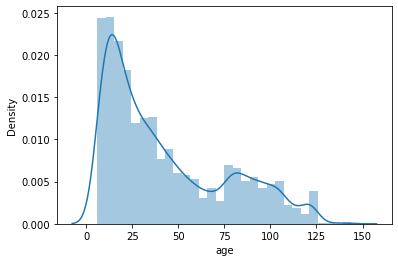

In [856]:
# Checking the distribution of the tenure variable

sns.distplot(data['age'],bins=30)
plt.show()

In [858]:
age_range = [0, 12, 24, 60, 108]
age_label = [ '0-12 Months', '1-2 Years', '2-5 Years','5 Yrs and above']
data['age_range'] = pd.cut(data['age'], age_range, labels=age_label)
data['age_range'].head()

12        0-12 Months
15          1-2 Years
23          1-2 Years
24          2-5 Years
25    5 Yrs and above
Name: age_range, dtype: category
Categories (4, object): ['0-12 Months' < '1-2 Years' < '2-5 Years' < '5 Yrs and above']

In [859]:
test_set['age_range'] = pd.cut(test_set['age'], age_range, labels=age_label)

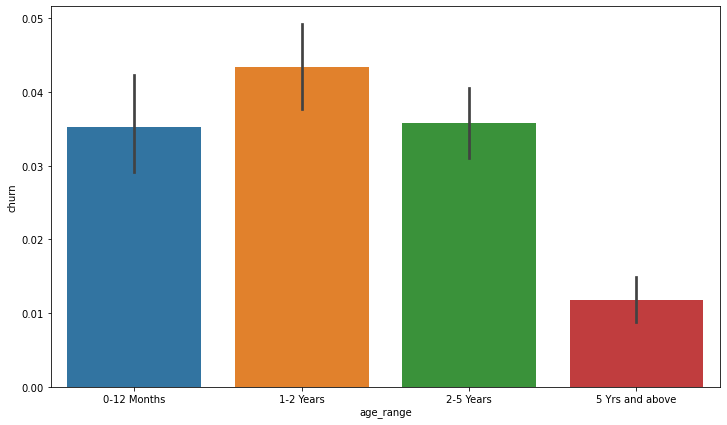

In [860]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='age_range',y='churn', data=data)
plt.show()

### 
It can be seen that the maximum churn rate happens within 1-2 Yrs, but it gradually decreases as the customer retains in the network

In [861]:
# Since we derived a new column from 'aon', we can drop it
data.drop('aon',axis=1, inplace=True)
test_set.drop('aon',axis=1, inplace=True)

Text(0.5, 1.0, 'Features Correlating with Churn variable')

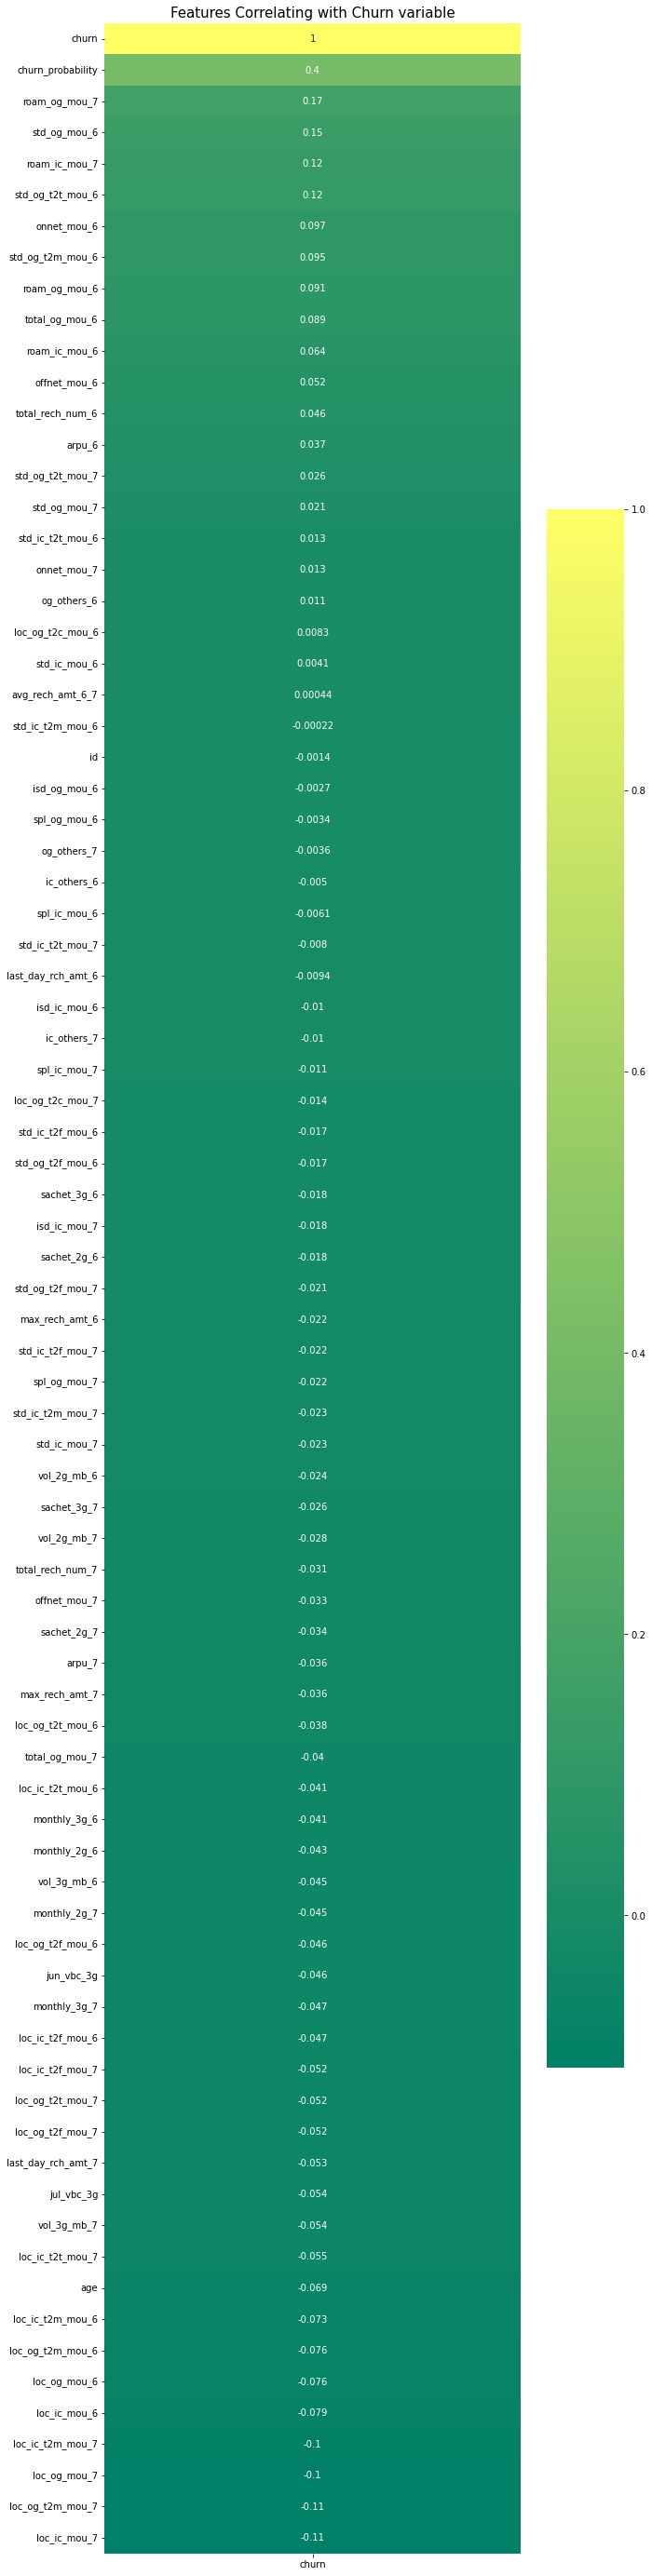

In [862]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(data.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

### 
Outgoing calls have a positive correlation with Target variable

Local calls within same telecom circle has negative correlation

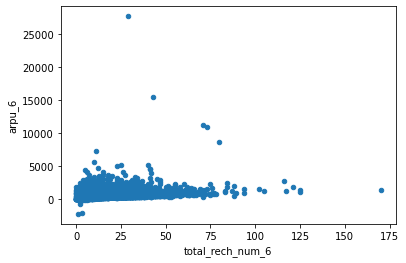

In [863]:
# lets now draw a scatter plot between total recharge and avg revenue for the 6th month
data[['total_rech_num_6', 'arpu_6']].plot.scatter(x = 'total_rech_num_6',
                                                              y='arpu_6')
plt.show()

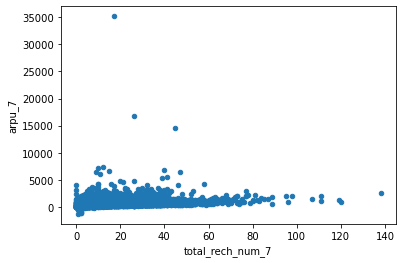

In [864]:
# lets now draw a scatter plot between total recharge and avg revenue for the 7th month
data[['total_rech_num_7', 'arpu_7']].plot.scatter(x = 'total_rech_num_7',
                                                              y='arpu_7')
plt.show()

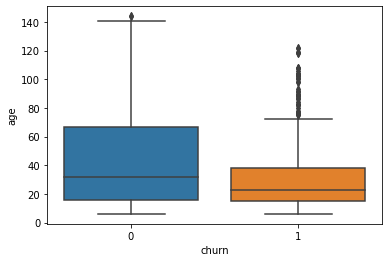

In [865]:

sns.boxplot(x = data.churn, y = data.age)

plt.show()

### 
This shows that with more age, customers tend to churn less

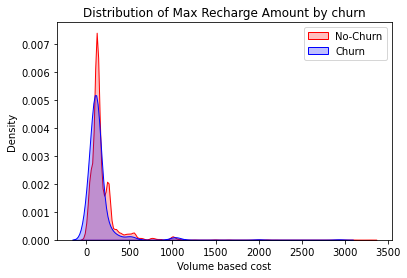

In [866]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(data.max_rech_amt_7[(data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data.max_rech_amt_7[(data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

In [867]:
data.columns

Index(['id', 'arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'spl_og_mou_6',
       'spl_og_mou_7', 'og_others_6', 'og_others_7', 'total_og_mou_6',
       'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7',
    

In [868]:
data.total_rech_num_6.unique()

array([ 15,   5,  26,   7,   8,  13,   4,  24,  10,   9,  20,  12,  43,
        14,   6,  11,  28,  18,  17,  25,  22,  19,  42,  46,  52,  39,
         3,  37,  16,  47,  33,  23,  31,  44,  32,  35,  21,  30,  53,
         1,   2,  27,  56,  29,   0,  45,  63,  64,  36,  50,  40,  65,
        38,  34,  51,  41,  61,  48,  59,  76,  49,  72,  77, 121,  71,
        83,  73,  66,  88, 170,  55,  94,  62, 116,  58,  84, 125,  68,
        60,  54,  67,  89,  69,  57,  87,  70,  74, 102, 105,  80, 117,
        75,  78])

In [869]:
# Creating categories for month 6 & 7 column totalrecharge and their count
data['total_rech_num_group_6']=pd.cut(data['total_rech_num_6'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
data['total_rech_num_group_7']=pd.cut(data['total_rech_num_7'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

test_set['total_rech_num_group_6']=pd.cut(test_set['total_rech_num_6'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
test_set['total_rech_num_group_7']=pd.cut(test_set['total_rech_num_7'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])


					Distribution of total_rech_num_6 variable
 <=10_Recharges     10659
10-25_Recharges     6992
>25_Recharges       1510
No_Recharge           19
Name: total_rech_num_group_6, dtype: int64


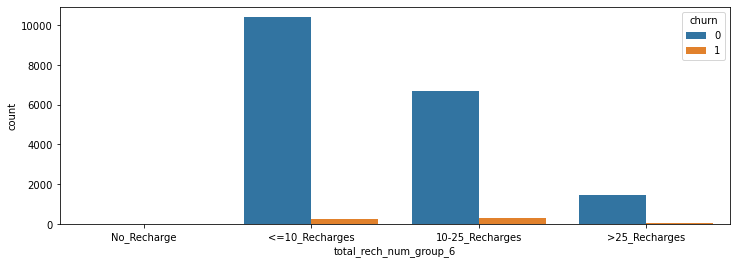

					Distribution of total_rech_num_7 variable
 <=10_Recharges     10783
10-25_Recharges     6765
>25_Recharges       1586
No_Recharge           46
Name: total_rech_num_group_7, dtype: int64


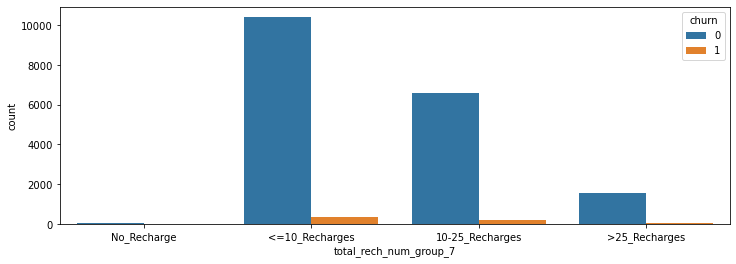

In [870]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=data,x="total_rech_num_group_6",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_6 variable\n",data['total_rech_num_group_6'].value_counts())
plt.show()

plt.figure(figsize=[12,4])
sns.countplot(data=data,x="total_rech_num_group_7",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_7 variable\n",data['total_rech_num_group_7'].value_counts())
plt.show()

### 
As the number of recharge rate increases, the churn rate decreases

In [871]:
# Creating a dummy variable for some of the categorical variables 
dummy = pd.get_dummies(data[['total_rech_num_group_6','total_rech_num_group_7','age_range']], drop_first=True)
dummy.head()

,total_rech_num_group_6_<=10_Recharges,total_rech_num_group_6_10-25_Recharges,total_rech_num_group_6_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,age_range_1-2 Years,age_range_2-5 Years,age_range_5 Yrs and above
12,0,1,0,1,0,0,0,0,0
15,1,0,0,1,0,0,1,0,0
23,0,0,1,0,1,0,1,0,0
24,1,0,0,1,0,0,0,1,0
25,1,0,0,1,0,0,0,0,1


In [872]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy], axis=1)
data.head()


,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,age,age_range,total_rech_num_group_6,total_rech_num_group_7,total_rech_num_group_6_<=10_Recharges,total_rech_num_group_6_10-25_Recharges,total_rech_num_group_6_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,age_range_1-2 Years,age_range_2-5 Years,age_range_5 Yrs and above
12,12,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,0.0,0.0,772.43,814.43,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,7.56,9.13,0.00,0.0,0.00,0.00,0.0,0.00,15,10,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,469.5,0,11.0,0-12 Months,10-25_Recharges,<=10_Recharges,0,1,0,1,0,0,0,0,0
15,15,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.00,1.03,0.00,0.0,0.00,0.00,0.0,0.00,5,3,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0,527.0,0,20.0,1-2 Years,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,1,0,0
23,23,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.0,0.0,202.08,0.00,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,207.03,0.00,0.13,0.0,0.00,0.00,0.0,0.15,26,19,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,1205.0,0,15.0,1-2 Years,>25_Recharges,10-25_Recharges,0,0,1,0,1,0,1,0,0
24,24,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,0.0,0.0,371.89,288.31,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,6.96,9.54,0.00,0.0,0.00,0.00,0.0,0.00,7,7,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,0.0,0.0,0,433.5,0,41.0,2-5 Years,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,1,0
25,25,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,0.0,0.0,399.39,114.51,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,26.64,19.68,0.00,0.0,4.01,2.28,0.0,0.00,8,5,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,405.0,0,94.0,5 Yrs and above,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1


In [873]:
# Dummy variables for test set
dummy = pd.get_dummies(test_set[['total_rech_num_group_6','total_rech_num_group_7','age_range']], drop_first=True)
dummy.head()

,total_rech_num_group_6_<=10_Recharges,total_rech_num_group_6_10-25_Recharges,total_rech_num_group_6_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,age_range_1-2 Years,age_range_2-5 Years,age_range_5 Yrs and above
0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0
4,0,1,0,1,0,0,1,0,0


In [874]:
# Adding the results to the master dataframe of test set
test_set = pd.concat([test_set, dummy], axis=1)
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,age,age_range,total_rech_num_group_6,total_rech_num_group_7,total_rech_num_group_6_<=10_Recharges,total_rech_num_group_6_10-25_Recharges,total_rech_num_group_6_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,age_range_1-2 Years,age_range_2-5 Years,age_range_5 Yrs and above
12,12,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,0.0,0.0,772.43,814.43,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,7.56,9.13,0.00,0.0,0.00,0.00,0.0,0.00,15,10,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,469.5,0,11.0,0-12 Months,10-25_Recharges,<=10_Recharges,0,1,0,1,0,0,0,0,0
15,15,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.00,1.03,0.00,0.0,0.00,0.00,0.0,0.00,5,3,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0,527.0,0,20.0,1-2 Years,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,1,0,0
23,23,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.0,0.0,202.08,0.00,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,207.03,0.00,0.13,0.0,0.00,0.00,0.0,0.15,26,19,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,1205.0,0,15.0,1-2 Years,>25_Recharges,10-25_Recharges,0,0,1,0,1,0,1,0,0
24,24,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,0.0,0.0,371.89,288.31,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,6.96,9.54,0.00,0.0,0.00,0.00,0.0,0.00,7,7,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,0.0,0.0,0,433.5,0,41.0,2-5 Years,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,1,0
25,25,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,0.0,0.0,399.39,114.51,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,26.64,19.68,0.00,0.0,4.01,2.28,0.0,0.00,8,5,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,405.0,0,94.0,5 Yrs and above,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1


In [875]:
data.columns

Index(['id', 'arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'spl_og_mou_6',
       'spl_og_mou_7', 'og_others_6', 'og_others_7', 'total_og_mou_6',
       'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7',
    

In [883]:
# Creating a copy of the filtered dataframe

df=data[:].copy()

# Dropping unwanted columns
df.drop(['age_range','id','total_rech_num_group_6','total_rech_num_group_7','age','churn_probability'], axis=1, inplace=True)



In [884]:
df.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_rech_num_group_6_<=10_Recharges,total_rech_num_group_6_10-25_Recharges,total_rech_num_group_6_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,age_range_1-2 Years,age_range_2-5 Years,age_range_5 Yrs and above
12,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,0.0,0.0,772.43,814.43,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,7.56,9.13,0.00,0.0,0.00,0.00,0.0,0.00,15,10,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,469.5,0,0,1,0,1,0,0,0,0,0
15,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.00,1.03,0.00,0.0,0.00,0.00,0.0,0.00,5,3,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0.0,0.0,527.0,0,1,0,0,1,0,0,1,0,0
23,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.0,0.0,202.08,0.00,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,207.03,0.00,0.13,0.0,0.00,0.00,0.0,0.15,26,19,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,1205.0,0,0,0,1,0,1,0,1,0,0
24,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,0.0,0.0,371.89,288.31,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,6.96,9.54,0.00,0.0,0.00,0.00,0.0,0.00,7,7,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,0.0,0.0,433.5,0,1,0,0,1,0,0,0,1,0
25,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,0.0,0.0,399.39,114.51,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,26.64,19.68,0.00,0.0,4.01,2.28,0.0,0.00,8,5,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,405.0,0,1,0,0,1,0,0,0,0,1


In [885]:
df.shape

(19180, 87)

In [886]:
df_test=test_set[:].copy()

# Dropping unwanted columns
df_test.drop(['age_range','id','total_rech_num_group_6','total_rech_num_group_7','age'], axis=1, inplace=True)


In [887]:
print(df.shape)
print(df_test.shape)

(19180, 87)
(30000, 86)


In [888]:
# create y dataframe for model building.
y=df['churn']
y.head()

12    0
15    0
23    0
24    0
25    0
Name: churn, dtype: int64

In [889]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [890]:
# splitting the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (13426, 86)
Dimension of X_test: (5754, 86)


In [891]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13426 entries, 49225 to 898
Data columns (total 86 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   arpu_6                                  13426 non-null  float64
 1   arpu_7                                  13426 non-null  float64
 2   onnet_mou_6                             13426 non-null  float64
 3   onnet_mou_7                             13426 non-null  float64
 4   offnet_mou_6                            13426 non-null  float64
 5   offnet_mou_7                            13426 non-null  float64
 6   roam_ic_mou_6                           13426 non-null  float64
 7   roam_ic_mou_7                           13426 non-null  float64
 8   roam_og_mou_6                           13426 non-null  float64
 9   roam_og_mou_7                           13426 non-null  float64
 10  loc_og_t2t_mou_6                        13426 non-null  

In [892]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [893]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

## Data Imbalance Handling

In [894]:
#pip install -U imbalanced-learn


In [895]:
#conda install -c conda-forge imbalanced-learn

In [896]:
from imblearn.over_sampling import SMOTE

In [897]:

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [898]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (26020, 86)
Dimension of y_train_sm Shape: (26020,)


## Logistic Regression

In [899]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [900]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                26020
Model:                            GLM   Df Residuals:                    25933
Model Family:                Binomial   Df Model:                           86
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 22 Mar 2023   Deviance:                       18906.
Time:                        20:30:11   Pearson chi2:                 1.91e+08
No. Iterations:                    33   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      4.1608      1.050      3.962      0.000       2.102       6.219
arpu_6                                   -11.4871      3.119     -3.683      0.000     -17.601      -5.373
arpu_7                                    18.5652      4.524      4.103      0.000       9.697      27.433
onnet_mou_6                              -86.4907     28.827     -3.000      0.003    -142.990     -29.991
onnet_mou_7                              -56.3615     34.971     -1.612      0.107    -124.903      12.180
offnet_mou_6                            -101.4247     32.418     -3.129      0.002    -164.963     -37.886
offnet_mou_7                             -95.8974     29.296     -3.273      0.001    -153.316     -38.479
roam_ic_mou_6                             -3.9557      0.970     -4.079      0.000      -5.856      -2.055
roam_ic_mou_7                              6.7797      1.707      3.971      0.000       3.433      10.126
roam_og_mou_6                             44.0118     14.741      2.986      0.003      15.119      72.904
roam_og_mou_7                             34.8681      7.983      4.368      0.000      19.222      50.514
loc_og_t2t_mou_6                         1.26e+05   2.29e+04      5.510      0.000    8.12e+04    1.71e+05
loc_og_t2t_mou_7                        1.145e+05   2.82e+04      4.062      0.000    5.92e+04     1.7e+05
loc_og_t2m_mou_6                        9.711e+04   1.76e+04      5.510      0.000    6.26e+04    1.32e+05
loc_og_t2m_mou_7                        7.051e+04   1.74e+04      4.063      0.000    3.65e+04    1.05e+05
loc_og_t2f_mou_6                        1.278e+04   2317.766      5.513      0.000    8235.092    1.73e+04
loc_og_t2f_mou_7                         1.26e+04   3105.462      4.057      0.000    6511.067    1.87e+04
loc_og_t2c_mou_6                          -0.4517      1.544     -0.292      0.770      -3.479       2.575
loc_og_t2c_mou_7                           7.1522      2.772      2.580      0.010       1.719      12.586
loc_og_mou_6                            -1.99e+05   2.88e+04     -6.908      0.000   -2.55e+05   -1.43e+05
loc_og_mou_7                           -1.186e+05   2.92e+04     -4.057      0.000   -1.76e+05   -6.13e+04
std_og_t2t_mou_6                        2.507e+04   3.02e+04      0.830      0.407   -3.41e+04    8.43e+04
std_og_t2t_mou_7                         -52.0506      7.761     -6.706      0.000     -67.262     -36.839
std_og_t2m_mou_6                         2.83e+04   3.41e+04      0.830      0.406   -3.85e+04    9.51e+04
std_og_t2f_mou_6                        1208.4417   1452.830      0.832      0.406   -1639.053    4055.936
std_og_t2f_mou_7                          -5.5293      1.960     -2.821      0.005     

## Logistic Regression using Feature Selection (RFE method)

In [901]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE



In [902]:
# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select=20)    
rfe = rfe.fit(X_train_sm, y_train_sm)

In [903]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['roam_og_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_mou_7',
       'std_og_mou_6', 'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'last_day_rch_amt_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_6', 'sachet_3g_7', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')


In [904]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 38),
 ('arpu_7', False, 10),
 ('onnet_mou_6', False, 18),
 ('onnet_mou_7', False, 62),
 ('offnet_mou_6', False, 47),
 ('offnet_mou_7', False, 14),
 ('roam_ic_mou_6', False, 17),
 ('roam_ic_mou_7', False, 7),
 ('roam_og_mou_6', False, 28),
 ('roam_og_mou_7', True, 1),
 ('loc_og_t2t_mou_6', False, 26),
 ('loc_og_t2t_mou_7', False, 25),
 ('loc_og_t2m_mou_6', False, 8),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2f_mou_6', False, 36),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2c_mou_6', False, 35),
 ('loc_og_t2c_mou_7', False, 48),
 ('loc_og_mou_6', False, 46),
 ('loc_og_mou_7', True, 1),
 ('std_og_t2t_mou_6', False, 61),
 ('std_og_t2t_mou_7', False, 45),
 ('std_og_t2m_mou_6', False, 15),
 ('std_og_t2f_mou_6', False, 60),
 ('std_og_t2f_mou_7', False, 19),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', False, 57),
 ('isd_og_mou_6', False, 39),
 ('spl_og_mou_6', False, 5),
 ('spl_og_mou_7', True, 1),
 ('og_others_6', False, 23),
 ('og_others_7', False, 58),
 ('total_og_mou

### Assessing the model with StatsModels

In [905]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                26020
Model:                            GLM   Df Residuals:                    25999
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10133.
Date:                Wed, 22 Mar 2023   Deviance:                       20266.
Time:                        20:30:26   Pearson chi2:                 1.28e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4553
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1392      0.041     27.490      0.000       1.058       1.220
roam_og_mou_7         16.0817      0.485     33.158      0.000      15.131      17.032
loc_og_t2m_mou_7     -12.4210      1.364     -9.105      0.000     -15.095      -9.747
loc_og_t2f_mou_7     -19.5569      2.918     -6.701      0.000     -25.277     -13.837
loc_og_mou_7           1.7393      1.177      1.477      0.140      -0.568       4.047
std_og_mou_6           9.3461      0.329     28.407      0.000       8.701       9.991
spl_og_mou_7          -8.3586      1.136     -7.359      0.000     -10.585      -6.133
total_og_mou_7        -7.1112      0.337    -21.075      0.000      -7.772      -6.450
loc_ic_t2m_mou_7      -6.1712      2.232     -2.765      0.006     -10.546      -1.797
loc_ic_t2f_mou_6      -0.4863      2.053     -0.237      0.813      -4.511       3.538
loc_ic_t2f_mou_7     -34.5021      3.620     -9.532      0.000     -41.596     -27.408
loc_ic_mou_6          -1.2111      0.952     -1.272      0.203      -3.077       0.655
loc_ic_mou_7         -21.2677      2.707     -7.857      0.000     -26.573     -15.963
last_day_rch_amt_7   -17.1329      0.784    -21.863      0.000     -18.669     -15.597
vol_3g_mb_7           -6.7009      2.671     -2.509      0.012     -11.936      -1.466
monthly_2g_7          -4.3717      0.437    -10.011      0.000      -5.228      -3.516
sachet_2g_7          -10.1336      0.862    -11.755      0.000     -11.823      -8.444
monthly_3g_6          -4.2378      0.767     -5.527      0.000      -5.741      -2.735
sachet_3g_7          -39.0229      3.763    -10.370      0.000     -46.398     -31.648
jul_vbc_3g           -21.5050      2.502     -8.596      0.000     -26.408     -16.602
jun_vbc_3g            -4.2230      1.844     -2.290      0.022      -7.837      -0.609
======================================================================================
"""

In [906]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2f_mou_6' as it has high p-value of 0.38
rfe_columns_1=rfe_columns.drop('loc_ic_t2f_mou_6',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['roam_og_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_mou_7',
       'std_og_mou_6', 'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'last_day_rch_amt_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_6', 'sachet_3g_7', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')


In [907]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                26020
Model:                            GLM   Df Residuals:                    26000
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10133.
Date:                Wed, 22 Mar 2023   Deviance:                       20266.
Time:                        20:30:27   Pearson chi2:                 1.28e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4553
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1392      0.041     27.485      0.000       1.058       1.220
roam_og_mou_7         16.0850      0.485     33.169      0.000      15.134      17.035
loc_og_t2m_mou_7     -12.4185      1.364     -9.105      0.000     -15.092      -9.745
loc_og_t2f_mou_7     -19.6308      2.903     -6.763      0.000     -25.320     -13.941
loc_og_mou_7           1.7463      1.177      1.484      0.138      -0.560       4.053
std_og_mou_6           9.3486      0.329     28.426      0.000       8.704       9.993
spl_og_mou_7          -8.3654      1.136     -7.366      0.000     -10.591      -6.140
total_og_mou_7        -7.1136      0.337    -21.090      0.000      -7.775      -6.453
loc_ic_t2m_mou_7      -6.1929      2.230     -2.777      0.005     -10.564      -1.822
loc_ic_t2f_mou_7     -34.8365      3.335    -10.447      0.000     -41.372     -28.301
loc_ic_mou_6          -1.2771      0.911     -1.401      0.161      -3.063       0.509
loc_ic_mou_7         -21.1986      2.690     -7.880      0.000     -26.471     -15.926
last_day_rch_amt_7   -17.1303      0.784    -21.863      0.000     -18.666     -15.595
vol_3g_mb_7           -6.6982      2.671     -2.508      0.012     -11.933      -1.464
monthly_2g_7          -4.3733      0.437    -10.015      0.000      -5.229      -3.517
sachet_2g_7          -10.1508      0.859    -11.812      0.000     -11.835      -8.466
monthly_3g_6          -4.2389      0.767     -5.529      0.000      -5.742      -2.736
sachet_3g_7          -39.0276      3.763    -10.371      0.000     -46.403     -31.652
jul_vbc_3g           -21.5138      2.502     -8.600      0.000     -26.417     -16.611
jun_vbc_3g            -4.2243      1.844     -2.291      0.022      -7.838      -0.611
======================================================================================
"""

In [908]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2m_mou_8' as it has high p-value of 0.15
rfe_columns_2=rfe_columns_1.drop('loc_og_mou_7',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['roam_og_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'std_og_mou_6',
       'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'last_day_rch_amt_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_6', 'sachet_3g_7', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')


In [909]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                26020
Model:                            GLM   Df Residuals:                    26001
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10134.
Date:                Wed, 22 Mar 2023   Deviance:                       20268.
Time:                        20:50:26   Pearson chi2:                 1.28e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4552
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1394      0.041     27.484      0.000       1.058       1.221
roam_og_mou_7         16.0921      0.486     33.144      0.000      15.140      17.044
loc_og_t2m_mou_7     -11.2214      1.098    -10.223      0.000     -13.373      -9.070
loc_og_t2f_mou_7     -19.4331      2.899     -6.703      0.000     -25.115     -13.751
std_og_mou_6           9.2512      0.321     28.798      0.000       8.622       9.881
spl_og_mou_7          -8.2892      1.134     -7.311      0.000     -10.511      -6.067
total_og_mou_7        -6.9967      0.327    -21.411      0.000      -7.637      -6.356
loc_ic_t2m_mou_7      -6.8264      2.179     -3.133      0.002     -11.098      -2.555
loc_ic_t2f_mou_7     -35.0251      3.330    -10.519      0.000     -41.551     -28.499
loc_ic_mou_6          -1.1148      0.902     -1.236      0.216      -2.883       0.653
loc_ic_mou_7         -20.4849      2.635     -7.774      0.000     -25.650     -15.320
last_day_rch_amt_7   -17.1370      0.784    -21.870      0.000     -18.673     -15.601
vol_3g_mb_7           -6.7048      2.671     -2.510      0.012     -11.939      -1.470
monthly_2g_7          -4.3768      0.437    -10.024      0.000      -5.233      -3.521
sachet_2g_7          -10.1402      0.859    -11.803      0.000     -11.824      -8.456
monthly_3g_6          -4.2456      0.767     -5.535      0.000      -5.749      -2.742
sachet_3g_7          -39.0460      3.764    -10.374      0.000     -46.423     -31.669
jul_vbc_3g           -21.5119      2.502     -8.597      0.000     -26.416     -16.608
jun_vbc_3g            -4.2376      1.846     -2.296      0.022      -7.855      -0.620
======================================================================================
"""

In [910]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([2.88597611e-01, 1.55569310e-04, 5.80230103e-03, 3.60838931e-01,
       2.51939195e-02, 6.99701040e-01, 2.64965860e-04, 1.39728369e-01,
       1.12314001e-02, 5.67062238e-01])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [911]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.288598
1,0,0.000156
2,0,0.005802
3,0,0.360839
4,0,0.025194


In [912]:
# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.288598,0
1,0,0.000156,0
2,0,0.005802,0
3,0,0.360839,0
4,0,0.025194,0


In [913]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[10410  2600]
 [ 1647 11363]]


In [914]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8367794004611837


In [915]:
# Check for the VIF values of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,vol_3g_mb_7,9.30
7,loc_ic_t2f_mou_7,5.80
10,last_day_rch_amt_7,5.26
3,std_og_mou_6,4.40
1,loc_og_t2m_mou_7,4.22
6,loc_ic_t2m_mou_7,3.83
8,loc_ic_mou_6,3.18
9,loc_ic_mou_7,3.07
4,spl_og_mou_7,2.55
13,sachet_2g_7,2.44


In [916]:
# Creating confusion metrics 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [917]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8734050730207533
Specificity =  0.8001537279016141
False Positive Rate =  0.19984627209838585
Precision =  0.8137935973644632
True Negative Prediction Rate =  0.8633988554366758


### Plotting the ROC Curve

In [918]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [919]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

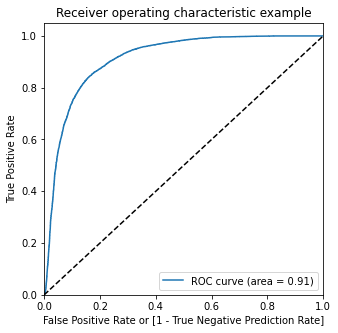

In [920]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [921]:
# Finding Optimal Cutoff Point

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.288598,0,1,1,1,0,0,0,0,0,0,0
1,0,0.000156,0,1,0,0,0,0,0,0,0,0,0
2,0,0.005802,0,1,0,0,0,0,0,0,0,0,0
3,0,0.360839,0,1,1,1,1,0,0,0,0,0,0
4,0,0.025194,0,1,0,0,0,0,0,0,0,0,0


In [922]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.723674     0.988547     0.458801
0.2          0.2  0.773713     0.971176     0.576249
0.3          0.3  0.806918     0.953497     0.660338
0.4          0.4  0.826749     0.921138     0.732360
0.5          0.5  0.836779     0.873405     0.800154
0.6          0.6  0.836972     0.809070     0.864873
0.7          0.7  0.805265     0.694158     0.916372
0.8          0.8  0.741891     0.529746     0.954035
0.9          0.9  0.640738     0.306149     0.975327


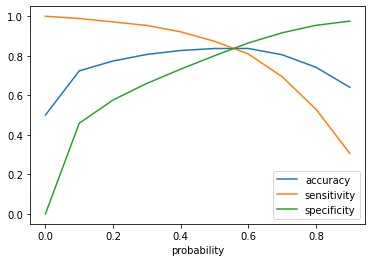

In [923]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

### 
Lets consider the cutoff point as 0.5

In [924]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.288598,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.000156,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.005802,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.360839,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.025194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [925]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.836779     0.873405     0.800154
0.51         0.51  0.837855     0.869254     0.806457
0.52         0.52  0.838624     0.864335     0.812913
0.53         0.53  0.839931     0.860031     0.819831
0.54         0.54  0.840354     0.854420     0.826287
0.55         0.55  0.840046     0.848194     0.831899
0.56         0.56  0.840546     0.841968     0.839124
0.57         0.57  0.840046     0.834512     0.845580
0.58         0.58  0.839508     0.827517     0.851499
0.59         0.59  0.838317     0.818140     0.858493


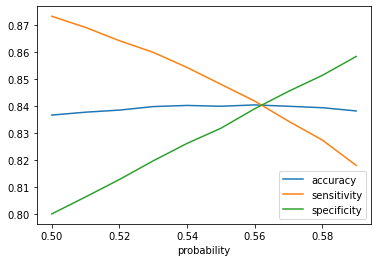

In [926]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

### 
From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.56


In [927]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.56 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.288598,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.000156,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.005802,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.360839,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.025194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [928]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))


The overall accuracy of the model now is: 0.8405457340507302


In [929]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[10917  2093]
 [ 2056 10954]]


In [930]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.841967717140661
Specificity =  0.8391237509607994
False Positive Rate =  0.16087624903920061
Precision =  0.8395799800720473
True Negative Prediction Rate =  0.8415169968395899


## Making predictions on the test set

In [931]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,total_rech_num_group_6_<=10_Recharges,total_rech_num_group_6_10-25_Recharges,total_rech_num_group_6_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,age_range_1-2 Years,age_range_2-5 Years,age_range_5 Yrs and above
65952,0.198380,0.088928,0.031994,0.024702,0.026367,0.041999,0.0,0.000000,0.0,0.000000,0.005196,0.003136,0.041045,0.043523,0.028968,0.008635,0.0,0.000000,0.039384,0.029787,0.027739,0.021920,0.001180,0.0,0.0,0.025396,0.032952,0.0,0.000000,0.001395,0.000000,0.0,0.053781,0.060160,0.005387,0.001258,0.019673,0.026181,0.000000,0.004604,0.023387,0.018826,0.000701,0.002226,0.002327,0.442822,0.0,0.0,0.002682,0.229365,0.000000,0.0,0.0,0.000000,0.003683,0.000000,0.023529,0.021739,0.056110,0.068202,0.056110,0.072581,0.103290,0.091905,0.000000,0.000000,0.25,0.2,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.003552,1,0,0,1,0,0,0,1,0
2287,0.257081,0.125778,0.053447,0.019385,0.053858,0.070561,0.0,0.000000,0.0,0.000000,0.040612,0.015101,0.072704,0.091072,0.000000,0.000626,0.0,0.009443,0.095711,0.068707,0.019926,0.005702,0.013096,0.0,0.0,0.030320,0.015018,0.0,0.000000,0.006825,0.000000,0.0,0.099506,0.079074,0.034226,0.034474,0.068766,0.111966,0.000000,0.000232,0.094740,0.100234,0.002202,0.005201,0.027775,0.021966,0.0,0.0,0.027252,0.014932,0.011640,0.0,0.0,0.004252,0.000000,0.000602,0.370588,0.333333,0.007481,0.015156,0.007481,0.009677,0.000000,0.000657,0.000000,0.000388,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.030303,0.000722,0.000003,0.055337,0,0,1,0,0,1,0,1,0
62192,0.187818,0.094624,0.002065,0.006094,0.006229,0.012873,0.0,0.000511,0.0,0.000000,0.002138,0.005028,0.008768,0.017092,0.000000,0.009432,0.0,0.000000,0.008810,0.016002,0.000299,0.001537,0.001312,0.0,0.0,0.001555,0.002156,0.0,0.001577,0.002956,0.043729,0.0,0.008433,0.017226,0.001086,0.002249,0.003406,0.014996,0.000000,0.000308,0.004180,0.011422,0.004871,0.000423,0.005869,0.000231,0.0,0.0,0.009165,0.000414,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.023529,0.036232,0.049377,0.060018,0.049377,0.063871,0.000153,0.000640,0.161628,0.076450,0.25,0.2,0.0,0.0,0.0,0.000,0.0,0.000000,0.035298,0.044942,0.001903,1,0,0,1,0,0,1,0,0
48964,0.219684,0.133805,0.118499,0.124827,0.139250,0.202922,0.0,0.000000,0.0,0.000000,0.143457,0.137597,0.247659,0.313657,0.002024,0.000000,0.0,0.000000,0.331301,0.318926,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.240163,0.295414,0.006457,0.005554,0.045370,0.066689,0.000189,0.001099,0.048949,0.046772,0.000000,0.000000,0.000000,0.000720,0.0,0.0,0.000000,0.000371,0.000000,0.0,0.0,0.000090,0.000000,0.000000,0.023529,0.021739,0.137157,0.166717,0.137157,0.081290,0.000000,0.005548,0.000000,0.043429,0.00,0.0,0.0,0.0,0.0,0.125,0.0,0.000000,0.072886,0.000000,0.036881,1,0,0,1,0,0,0,0,1
52820,0.203447,0.083902,0.002563,0.000571,0.060573,0.018847,0.0,0.013998,0.0,0.

In [932]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,roam_og_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,std_og_mou_6,spl_og_mou_7,total_og_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,last_day_rch_amt_7,vol_3g_mb_7,monthly_2g_7,sachet_2g_7,monthly_3g_6,sachet_3g_7,jul_vbc_3g,jun_vbc_3g
65952,0.000000,0.043523,0.008635,0.025396,0.001395,0.060160,0.026181,0.004604,0.023387,0.018826,0.072581,0.000000,0.2,0.0,0.0,0.000000,0.000000,0.000000
2287,0.000000,0.091072,0.000626,0.030320,0.006825,0.079074,0.111966,0.000232,0.094740,0.100234,0.009677,0.000388,0.0,0.0,0.0,0.030303,0.000722,0.000003
62192,0.000000,0.017092,0.009432,0.001555,0.002956,0.017226,0.014996,0.000308,0.004180,0.011422,0.063871,0.076450,0.2,0.0,0.0,0.000000,0.035298,0.044942
48964,0.000000,0.313657,0.000000,0.000000,0.000000,0.295414,0.066689,0.001099,0.048949,0.046772,0.081290,0.043429,0.0,0.0,0.0,0.000000,0.072886,0.000000
52820,0.007963,0.003897,0.000000,0.054865,0.000203,0.014759,0.004467,0.000000,0.041551,0.003929,0.035484,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [933]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [934]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 65952    0.070097
2287     0.010744
62192    0.041077
48964    0.000100
52820    0.702877
61590    0.017721
51731    0.831517
5223     0.784277
34489    0.211462
9712     0.010211
dtype: float64


In [935]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
65952,0.070097
2287,0.010744
62192,0.041077
48964,0.000100
52820,0.702877


In [936]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [937]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
65952,0
2287,0
62192,0
48964,0
52820,0


In [938]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
65952,0,0.070097
2287,0,0.010744
62192,0,0.041077
48964,0,0.000100
52820,0,0.702877


In [939]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.56 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
65952,0,0.070097,0
2287,0,0.010744,0
62192,0,0.041077,0
48964,0,0.000100,0
52820,0,0.702877,1


In [940]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8345498783454988

In [943]:
## MAKING PREDICTIONS ON TEST DATA(SEPARATE)

# Scaling the test data
df_test[num_col] = scaler.transform(df_test[num_col])
df_test.head()

# Feature selection
df_test=df_test[rfe_columns_2]
df_test.head()

# Adding constant to the test model.
df_test_SM = sm.add_constant(df_test)

test_set_pred = res.predict(df_test_SM)
print("\n The first ten probability value of the prediction are:\n",test_set_pred[:10])

test_pred = pd.DataFrame(test_set_pred)
test_pred.head()




 The first ten probability value of the prediction are:
 0    0.618076
1    0.165641
2    0.431005
3    0.063396
4    0.581395
5    0.805575
6    0.721243
7    0.655204
8    0.335008
9         NaN
dtype: float64


,0
0,0.618076
1,0.165641
2,0.431005
3,0.063396
4,0.581395


In [944]:
test_pred=test_pred.rename(columns = {0:"Conv_prob"})

In [947]:
y_test_df = pd.DataFrame(test_pred)

In [948]:
y_test_df

,Conv_prob
0,0.618076
1,0.165641
2,0.431005
3,0.063396
4,0.581395
...,...
29995,0.037030
29996,0.466079
29997,0.726988
29998,0.812065


In [949]:
y_test_df['test_churn_pred'] = y_test_df.Conv_prob.map(lambda x: 1 if x>0.56 else 0)
y_test_df.head()

,Conv_prob,test_churn_pred
0,0.618076,1
1,0.165641,0
2,0.431005,0
3,0.063396,0
4,0.581395,1


In [970]:
y_test_df.drop(['Conv_prob'],axis=1,inplace=True)

In [972]:
y_test_df.head()

,test_churn_pred
0,1
1,0
2,0
3,0
4,1


In [977]:
y_test_df.to_csv('telecom_churn_test_set_result.csv')

In [950]:
# Metrics Evaluation

In [951]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[4662  916]
 [  36  140]]


In [952]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [953]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7954545454545454
Specificity =  0.8357834349229114
False Positive Rate =  0.16421656507708857
Precision =  0.13257575757575757
True Negative Prediction Rate =  0.9923371647509579


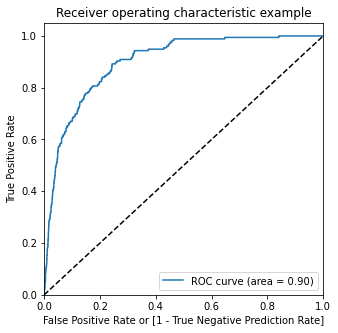

In [954]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

### 
The AUC score for train dataset is 0.90 and the test dataset is 0.87.
This model can be considered as a good model.

## Logistic Regression using PCA

In [955]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (13426, 86)
Dimension of X_test: (5754, 86)
Dimension of X_train_sm Shape: (26020, 86)
Dimension of y_train_sm Shape: (26020,)


,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,total_rech_num_group_6_<=10_Recharges,total_rech_num_group_6_10-25_Recharges,total_rech_num_group_6_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,age_range_1-2 Years,age_range_2-5 Years,age_range_5 Yrs and above
0,0.175275,0.114845,0.011677,0.083780,0.006076,0.037090,0.001630,0.0,0.002395,0.0,0.000868,0.007336,0.008193,0.021994,0.000000,0.001999,0.000000,0.004967,0.007115,0.020347,0.010370,0.077353,0.000930,0.00000,0.000000,0.009976,0.095693,0.000000,0.000000,0.014475,0.000000,0.0,0.015069,0.114416,0.002826,0.008123,0.002784,0.020618,0.000000,0.000292,0.005053,0.020101,0.000000,0.000000,0.000000,0.001853,0.00000,0.000423,0.000000,0.001024,0.000000,0.014859,0.000000,0.000000,0.000000,0.000000,0.047059,0.239130,0.007481,0.019703,0.007481,0.020968,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.008404,1,0,0,0,0,1,0,1,0
1,0.189711,0.115423,0.017201,0.024405,0.035681,0.044529,0.000000,0.0,0.000000,0.0,0.020824,0.026902,0.061150,0.066853,0.011561,0.002097,0.000000,0.000000,0.068461,0.065862,0.000000,0.000000,0.000482,0.00000,0.013043,0.000476,0.000893,0.000000,0.000000,0.000000,0.000000,0.0,0.050102,0.061885,0.024211,0.019588,0.038665,0.044676,0.028623,0.014907,0.065618,0.049690,0.000000,0.000000,0.000119,0.000876,0.00000,0.000000,0.000109,0.000451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035294,0.043478,0.038404,0.098515,0.029925,0.049677,0.018839,0.026332,0.040590,0.047421,0.25,0.4,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.162972,0.081221,0.020010,1,0,0,1,0,0,0,0,1
2,0.227115,0.123735,0.028223,0.017098,0.047509,0.053143,0.030398,0.0,0.009557,0.0,0.009889,0.003870,0.057782,0.067727,0.066000,0.019231,0.000000,0.000000,0.060525,0.045992,0.019574,0.013626,0.004162,0.05125,0.015380,0.023358,0.018488,0.001116,0.000000,0.014703,0.000000,0.0,0.067273,0.062199,0.008012,0.006219,0.057022,0.124978,0.055025,0.021876,0.077037,0.090028,0.007056,0.023459,0.027336,0.061590,0.00937,0.113275,0.033826,0.067140,0.003036,0.000000,0.000000,0.002283,0.000737,0.000307,0.058824,0.050725,0.049875,0.068202,0.031920,0.072581,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000104,0.003040,0.034915,1,0,0,1,0,0,0,1,0
3,0.191191,0.092197,0.017168,0.016025,0.028490,0.024387,0.000000,0.0,0.000000,0.0,0.004567,0.004501,0.003813,0.003162,0.000000,0.000000,0.000000,0.000000,0.007433,0.006219,0.013413,0.011976,0.025099,0.00000,0.000000,0.036465,0.030352,0.000000,0.018956,0.022556,0.008273,0.0,0.043498,0.037783,0.004877,0.007941,0.007668,0.010258,0.000000,0.000000,0.011462,0.013401,0.000349,0.002576,0.010324,0.006106,0.00000,0.000000,0.009768,0.004941,0.000000,0.000000,0.000005,0.006463,0.000000,0.017253,0.058824,0.101449,0.024439,0.019703,0.010973,0.020968,0.037178,0.033733,0.000000,0.0

In [956]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [957]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)


Dimension of X_train_sm_pca:  (26020, 86)
Dimension of X_test_pca:  (5754, 86)


In [958]:
#Viewing the PCA components
pca.components_

array([[ 8.27907887e-03,  4.85831016e-03,  1.95432093e-02, ...,
         8.80499169e-02,  3.34296624e-03, -1.04301893e-01],
       [-4.33146962e-03,  2.18339372e-03, -9.48094641e-03, ...,
         6.17918698e-01, -6.96682957e-01,  6.23325123e-02],
       [-9.42844090e-03,  8.37955604e-03, -1.89087724e-02, ...,
        -2.11258138e-01,  2.83981338e-01, -2.23286541e-02],
       ...,
       [ 3.09705384e-07, -2.07181160e-06, -3.47220225e-06, ...,
        -1.61544047e-08,  7.55561634e-09, -5.68911129e-08],
       [ 6.76437391e-08, -7.46829718e-08, -4.26633581e-06, ...,
         4.78806469e-08,  3.42636602e-08,  2.56130746e-08],
       [-1.43514275e-07,  1.02903029e-06, -4.10257594e-06, ...,
        -2.86290645e-09, -1.95241312e-08,  6.53992700e-09]])

In [959]:
# Performing Logistic Regression

logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (5754, 1)


In [633]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[4995  583]
 [  28  148]] 

Accuracy of the logistic regression model with PCA:  0.8938129996524157


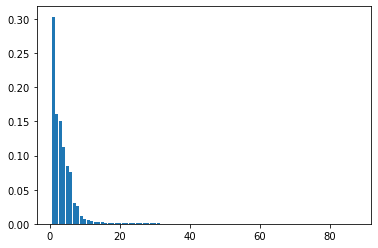

In [634]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

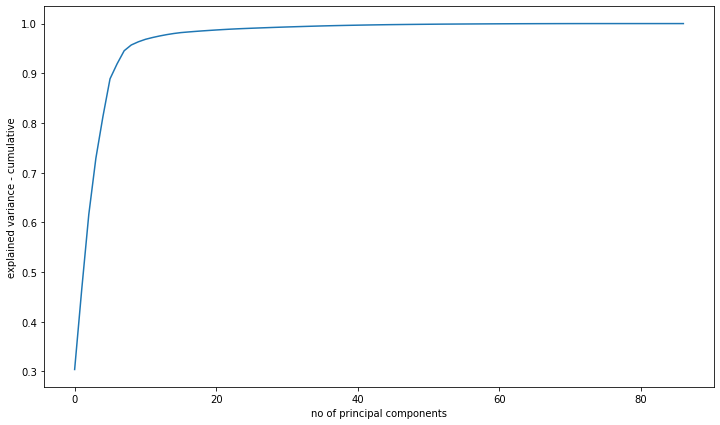

In [635]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

### 
*90% of the data can be explained with 8 PCA components

In [636]:
# Fitting the dataset with the 8 explainable components

In [637]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (26020, 15)
Dimension for Test dataset using PCA:  (5754, 15)


In [640]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (5754, 1)


In [643]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[5005  573]
 [  30  146]] 

Accuracy of the logistic regression model with PCA:  0.8952033368091762
